<h1 style="color:Black;text-align:center">Saed - Call volumes and other stuff</h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
calls = pd.read_csv("../data/callsforservicefiltered.csv")

C:\Users\saadm\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
calls = calls[calls.nature != 'TRANSPORT TO ANIMAL SHELTER']
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls = calls.drop(columns = ['statbeat','ra'])
calls

,callsource,city,nature,nature2,priority,rptonly,service,agency,district,gp,...,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,year,month,dayOfMonth,hour
0,SELF,G,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD3,SD34,...,0,0,651,0,0,S335,2012,7,1,0
1,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,627,...,393,1881,2454,43,965,M261,2012,7,1,0
3,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,513,...,854,1457,4522,30,3918,M2,2012,7,1,0
4,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,44C,...,677,0,900,8,0,E44,2012,7,1,0
5,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,406,...,0,0,0,10,0,M241,2012,7,1,0
6,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,119,...,224,1253,2295,29,1267,M211,2012,7,1,0
7,SELF,ST,TRAFFIC STOP,NaN,1,False,LAW,GCSD,SD1,SD16,...,0,0,112,0,0,S314,2012,7,1,0
8,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,202,...,277,1043,2090,17,1323,M221,2012,7,1,0
9,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,SD12,...,290,0,1109,102,0,S314,2012,7,1,0
10,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,P110,...,0,0,3734,0,0,S324,2012,7,1,0


<p>Here, we are just counting the number of <b>nulls</b> per each column, and displaying the datetype if it's not object.<br>If it is an object, we display the number of categories, in other words, the number of <b>distinct</b> values in that column.</p>

In [7]:
k = 0
for i in calls.columns:
    dtype = calls.dtypes[k].name
    if dtype == 'object':
        print i, ": nulls = ", len(calls.loc[calls[i].isnull()]), ", categories = ", \
        len(calls[i].astype('category').cat.categories)
    else:
        print i, ": nulls = ", len(calls.loc[calls[i].isnull()]), ", type = ", dtype
    k+=1

 callsource : nulls =  3 , categories =  22
city : nulls =  681 , categories =  30
nature : nulls =  0 , categories =  259
nature2 : nulls =  986975 , categories =  167
priority : nulls =  243 , categories =  10
rptonly : nulls =  0 , type =  bool
service : nulls =  0 , categories =  5
agency : nulls =  0 , categories =  4
district : nulls =  80499 , categories =  63
gp : nulls =  83801 , categories =  857
primeunit : nulls =  429 , categories =  1213
cancelled : nulls =  0 , type =  bool
closecode : nulls =  0 , categories =  33
dayOfWeek : nulls =  0 , type =  int64
secs2rt : nulls =  0 , type =  int64
secs2di : nulls =  0 , type =  int64
secs2en : nulls =  0 , type =  int64
secs2ar : nulls =  0 , type =  int64
secs2tr : nulls =  0 , type =  int64
secs2lc : nulls =  0 , type =  int64
secsdi2en : nulls =  0 , type =  int64
secsdi2ar : nulls =  0 , type =  int64
secsar2tr : nulls =  0 , type =  int64
secsar2lc : nulls =  0 , type =  int64
secsrt2dsp : nulls =  0 , type =  int64
secstr2

In [8]:
print "The number of rows that have NaN values in district, statbeat, ra, and gp = ", \
len(calls.loc[calls['district'].isnull() & calls['gp'].isnull()])

The number of rows that have NaN values in district, statbeat, ra, and gp =  80488


In [9]:
total_calls = len(calls)
for city in calls.city.unique():
    if str(city) != 'nan':
        total_calls_city = len(calls.loc[calls.city == city])
    else:
        total_calls_city = len(calls.loc[calls.city.isnull()])
    percentage = total_calls_city*10000/total_calls
    print ("City '{}' has '{}' calls ({}.{}%).".format(city, total_calls_city, percentage/100, percentage%100))

City 'G' has '618589' calls (57.95%).
City 'W' has '30624' calls (2.86%).
City 'ST' has '15133' calls (1.41%).
City 'H' has '138414' calls (12.96%).
City 'SU' has '31617' calls (2.96%).
City 'CLI' has '6222' calls (0.58%).
City 'P' has '16288' calls (1.52%).
City 'ALAM' has '2326' calls (0.21%).
City 'J' has '53114' calls (4.97%).
City 'M' has '34346' calls (3.21%).
City 'JU' has '11451' calls (1.7%).
City 'B' has '29473' calls (2.76%).
City 'COL' has '10157' calls (0.95%).
City 'ROCK' has '2703' calls (0.25%).
City 'L' has '6154' calls (0.57%).
City 'OAK' has '16277' calls (1.52%).
City 'A' has '2153' calls (0.20%).
City 'K' has '6063' calls (0.56%).
City 'RAN' has '3535' calls (0.33%).
City 'GI' has '26739' calls (2.50%).
City 'E' has '1364' calls (0.12%).
City 'BUR' has '2272' calls (0.21%).
City 'REI' has '267' calls (0.2%).
City 'RAND' has '977' calls (0.9%).
City 'nan' has '681' calls (0.6%).
City 'FORS' has '369' calls (0.3%).
City 'DAVI' has '2' calls (0.0%).
City 'BURL' has '2

In [10]:
def plot_city_county(calls, mycity):
    plt.figure(figsize=(20,42))
    rng = np.arange(2012,2020)
    plt.subplot(5,2,1).set_title('Year - Guilford county')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.year, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,14)
    plt.subplot(5,2,3).set_title('Month - Guilford county')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.month, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,33)
    plt.subplot(5,2,5).set_title('Day of Month - Guilford county')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.dayOfMonth, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,9)
    plt.subplot(5,2,7).set_title('Day of Week - Guilford county')
    plt.xticks(rng, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.dayOfWeek, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,25)
    plt.subplot(5,2,9).set_title('Hour - Guilford county')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.hour, bins=rng-0.5, rwidth=0.75)
    
    rng = np.arange(2012,2020)
    plt.subplot(5,2,2).set_title('Year - "' + mycity + '" city')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.loc[calls.city == mycity].year, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,14)
    plt.subplot(5,2,4).set_title('Month - "' + mycity + '" city')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.loc[calls.city == mycity].month, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,33)
    plt.subplot(5,2,6).set_title('Day of Month - "' + mycity + '" city')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.loc[calls.city == mycity].dayOfMonth, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,9)
    plt.subplot(5,2,8).set_title('Day of Week - "' + mycity + '" city')
    plt.xticks(rng, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.loc[calls.city == mycity].dayOfWeek, bins=rng-0.5, rwidth=0.75)

    rng = np.arange(1,25)
    plt.subplot(5,2,10).set_title('Hour - "' + mycity + '" city')
    plt.xticks(rng)
    plt.xlim(rng.min()-0.7, rng.max()-0.3)
    plt.hist(calls.loc[calls.city == mycity].hour, bins=rng-0.5, rwidth=0.75)

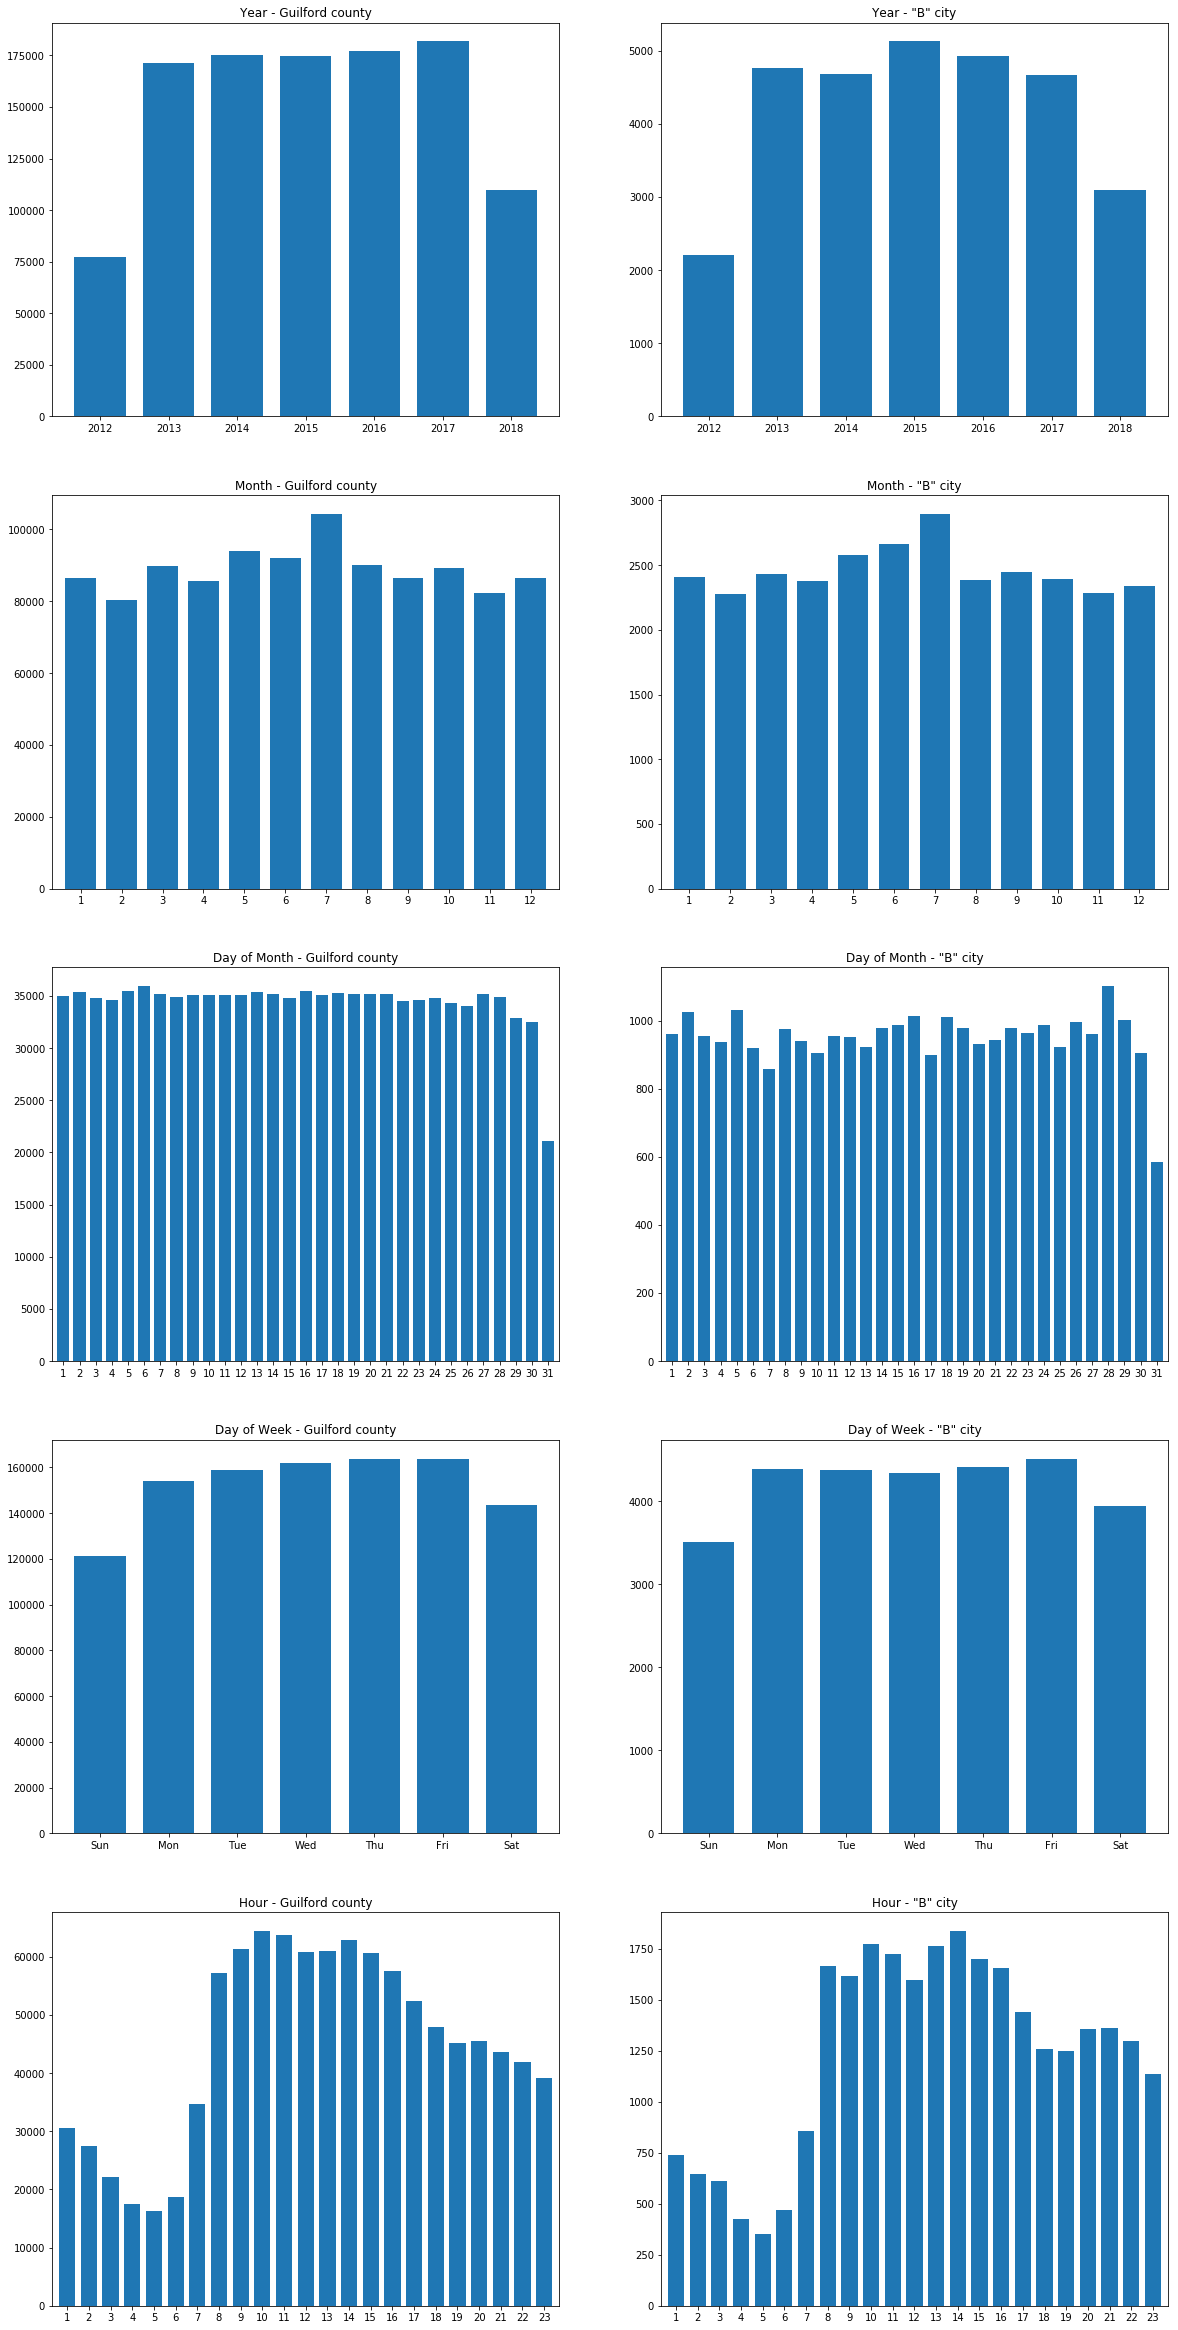

In [11]:
plot_city_county(calls, 'B')

To compare the previous graphs, we can use a statistical method called <b> Kolmogorov–Smirnov test </b>.

The lower the value it returns, the more of a chance that those sets are drawn from the same continuous distribution, for the sake of simplicity, we will call this value a 'mismatch percentage'.

In [12]:
from scipy import stats
for city in calls.city.unique():
    if str(city) != 'nan':
        total_calls_city = len(calls.loc[calls.city == city])
    else:
        continue
    print "The mismatch percentage with city '{0}' regarding call natures is {2} (For {1} calls).".format(city, total_calls_city, stats.ks_2samp(calls.loc[calls.city == city].nature.astype('category').cat.codes, calls.nature.astype('category').cat.codes)[0])

The mismatch percentage with city 'G' regarding call natures is 0.0759325348349 (For 618589 calls).
The mismatch percentage with city 'W' regarding call natures is 0.366947929283 (For 30624 calls).
The mismatch percentage with city 'ST' regarding call natures is 0.398722922117 (For 15133 calls).
The mismatch percentage with city 'H' regarding call natures is 0.391655093284 (For 138414 calls).
The mismatch percentage with city 'SU' regarding call natures is 0.364452805682 (For 31617 calls).
The mismatch percentage with city 'CLI' regarding call natures is 0.448055418274 (For 6222 calls).
The mismatch percentage with city 'P' regarding call natures is 0.387634696088 (For 16288 calls).
The mismatch percentage with city 'ALAM' regarding call natures is 0.756975754078 (For 2326 calls).
The mismatch percentage with city 'J' regarding call natures is 0.379919613405 (For 53114 calls).
The mismatch percentage with city 'M' regarding call natures is 0.345292679702 (For 34346 calls).
The mismatch

Getting the `nature` and `nature2` values where `nature2` is not null and `nature` != `nature`

In [13]:
old_nature_list = []
new_nature_list = []
for key, row in calls.iterrows():
    if(str(row['nature2']) != 'nan' and row['nature'] != row['nature2']):
        old_nature_list.append(row['nature'])
        new_nature_list.append(row['nature2'])

Printing the most occuring pairs, e.g. `EMS RESPONSE - EMERGENCY` was replaced by `LAW ASSISTANCE NEED` 343 times.

In [14]:
pd.Series(zip(old_nature_list, new_nature_list)).value_counts()

(EMS RESPONSE - EMERGENCY, LAW ASSISTANCE NEEDED)                 343
(SUSPICIOUS VEHICLE, TRAFFIC STOP)                                258
(EMS RESPONSE - NON EMERGENCY, LAW ASSISTANCE NEEDED)             228
(EMS RESPONSE - NON EMERGENCY, TRAFFIC STOP)                      227
(TRAFFIC ASSISTANCE NEEDED, TRAFFIC STOP)                         204
(EMS RESPONSE - EMERGENCY, TRAFFIC STOP)                          195
(EMS RESPONSE - NON EMERGENCY, CHECK WELFARE/ASSIST FAMILY)       158
(ACCIDENT WITH PERSONAL INJURY, ACCIDENT WITH PROPERTY DAMAGE)    145
(EMS RESPONSE - EMERGENCY, FIRE ONLY - MEDICAL ASSISTANCE)        144
(EMS RESPONSE - NON EMERGENCY, FIRE ONLY - MEDICAL ASSISTANCE)    115
(ACCIDENT WITH PROPERTY DAMAGE, TRAFFIC STOP)                      86
(EMS RESPONSE - NON EMERGENCY, SUSPICIOUS SUBJECT)                 85
(LAW ASSISTANCE NEEDED, TRAFFIC STOP)                              67
(EMS RESPONSE - NON EMERGENCY, DISORDERLY SUBJECT OR CROWD)        66
(C1-FOLLOW UP, TRAFF

Printing the most <b>replaced</b> natures.

In [15]:
print pd.Series(old_nature_list).value_counts()

EMS RESPONSE - NON EMERGENCY      1413
EMS RESPONSE - EMERGENCY          1035
TRAFFIC ASSISTANCE NEEDED          315
SUSPICIOUS VEHICLE                 309
ACCIDENT WITH PERSONAL INJURY      237
LAW ASSISTANCE NEEDED              194
ACCIDENT WITH PROPERTY DAMAGE      172
C1-FOLLOW UP                        93
SUSPICIOUS ACTIVITY                 90
NARCOTICS VIOLATION                 80
C22-WARRANT-GCSD ONLY               79
SUSPICIOUS SUBJECT                  70
LEGAL PAPER / COMPLAINT             56
ZASSIST                             55
FIRE ONLY - MEDICAL ASSISTANCE      54
PURSUIT - VEHICLE OR SUBJECT        47
TRAFFIC STOP                        45
C21-PADLOCK-GCSD ONLY               43
RECOVERED STOLEN PROPERTY           33
CHECK WELFARE/ASSIST FAMILY         33
CHEST PAIN                          31
FIRE ASSISTANCE NEEDED              31
CITIZEN ASSIST / SERVICE CALL       31
ESCORT                              30
MENTAL SUBJECT/COMMIT SERV          27
C19-50B-GCSD ONLY        

Printing most <b>replaced-by</b> natures.

In [16]:
print pd.Series(new_nature_list).value_counts()

TRAFFIC STOP                      1723
LAW ASSISTANCE NEEDED              676
FIRE ONLY - MEDICAL ASSISTANCE     326
ACCIDENT WITH PROPERTY DAMAGE      275
CHECK WELFARE/ASSIST FAMILY        251
SUSPICIOUS SUBJECT                 181
SUSPICIOUS VEHICLE                 170
FIRE ASSISTANCE NEEDED             162
SUSPICIOUS ACTIVITY                128
TRAFFIC ASSISTANCE NEEDED          123
LEGAL PAPER / COMPLAINT            101
DISORDERLY SUBJECT OR CROWD         97
CITIZEN ASSIST / SERVICE CALL       86
INTOXICATED SUBJECT                 83
FIGHT                               71
C1-FOLLOW UP                        62
ASSAULT (NO EMS NEEDED)             58
EMS RESPONSE - NON EMERGENCY        52
ACCIDENT W/INJURY-GPD REPORT        51
DOMESTIC DISPUTE                    41
ANIMAL RELATED CALL                 40
NARCOTICS VIOLATION                 30
C22-WARRANT-GCSD ONLY               30
MENTAL SUBJECT/COMMIT SERV          28
ACCIDENT WITH PERSONAL INJURY       26
C21-PADLOCK-GCSD ONLY    